In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startups-funding/startup_funding.csv


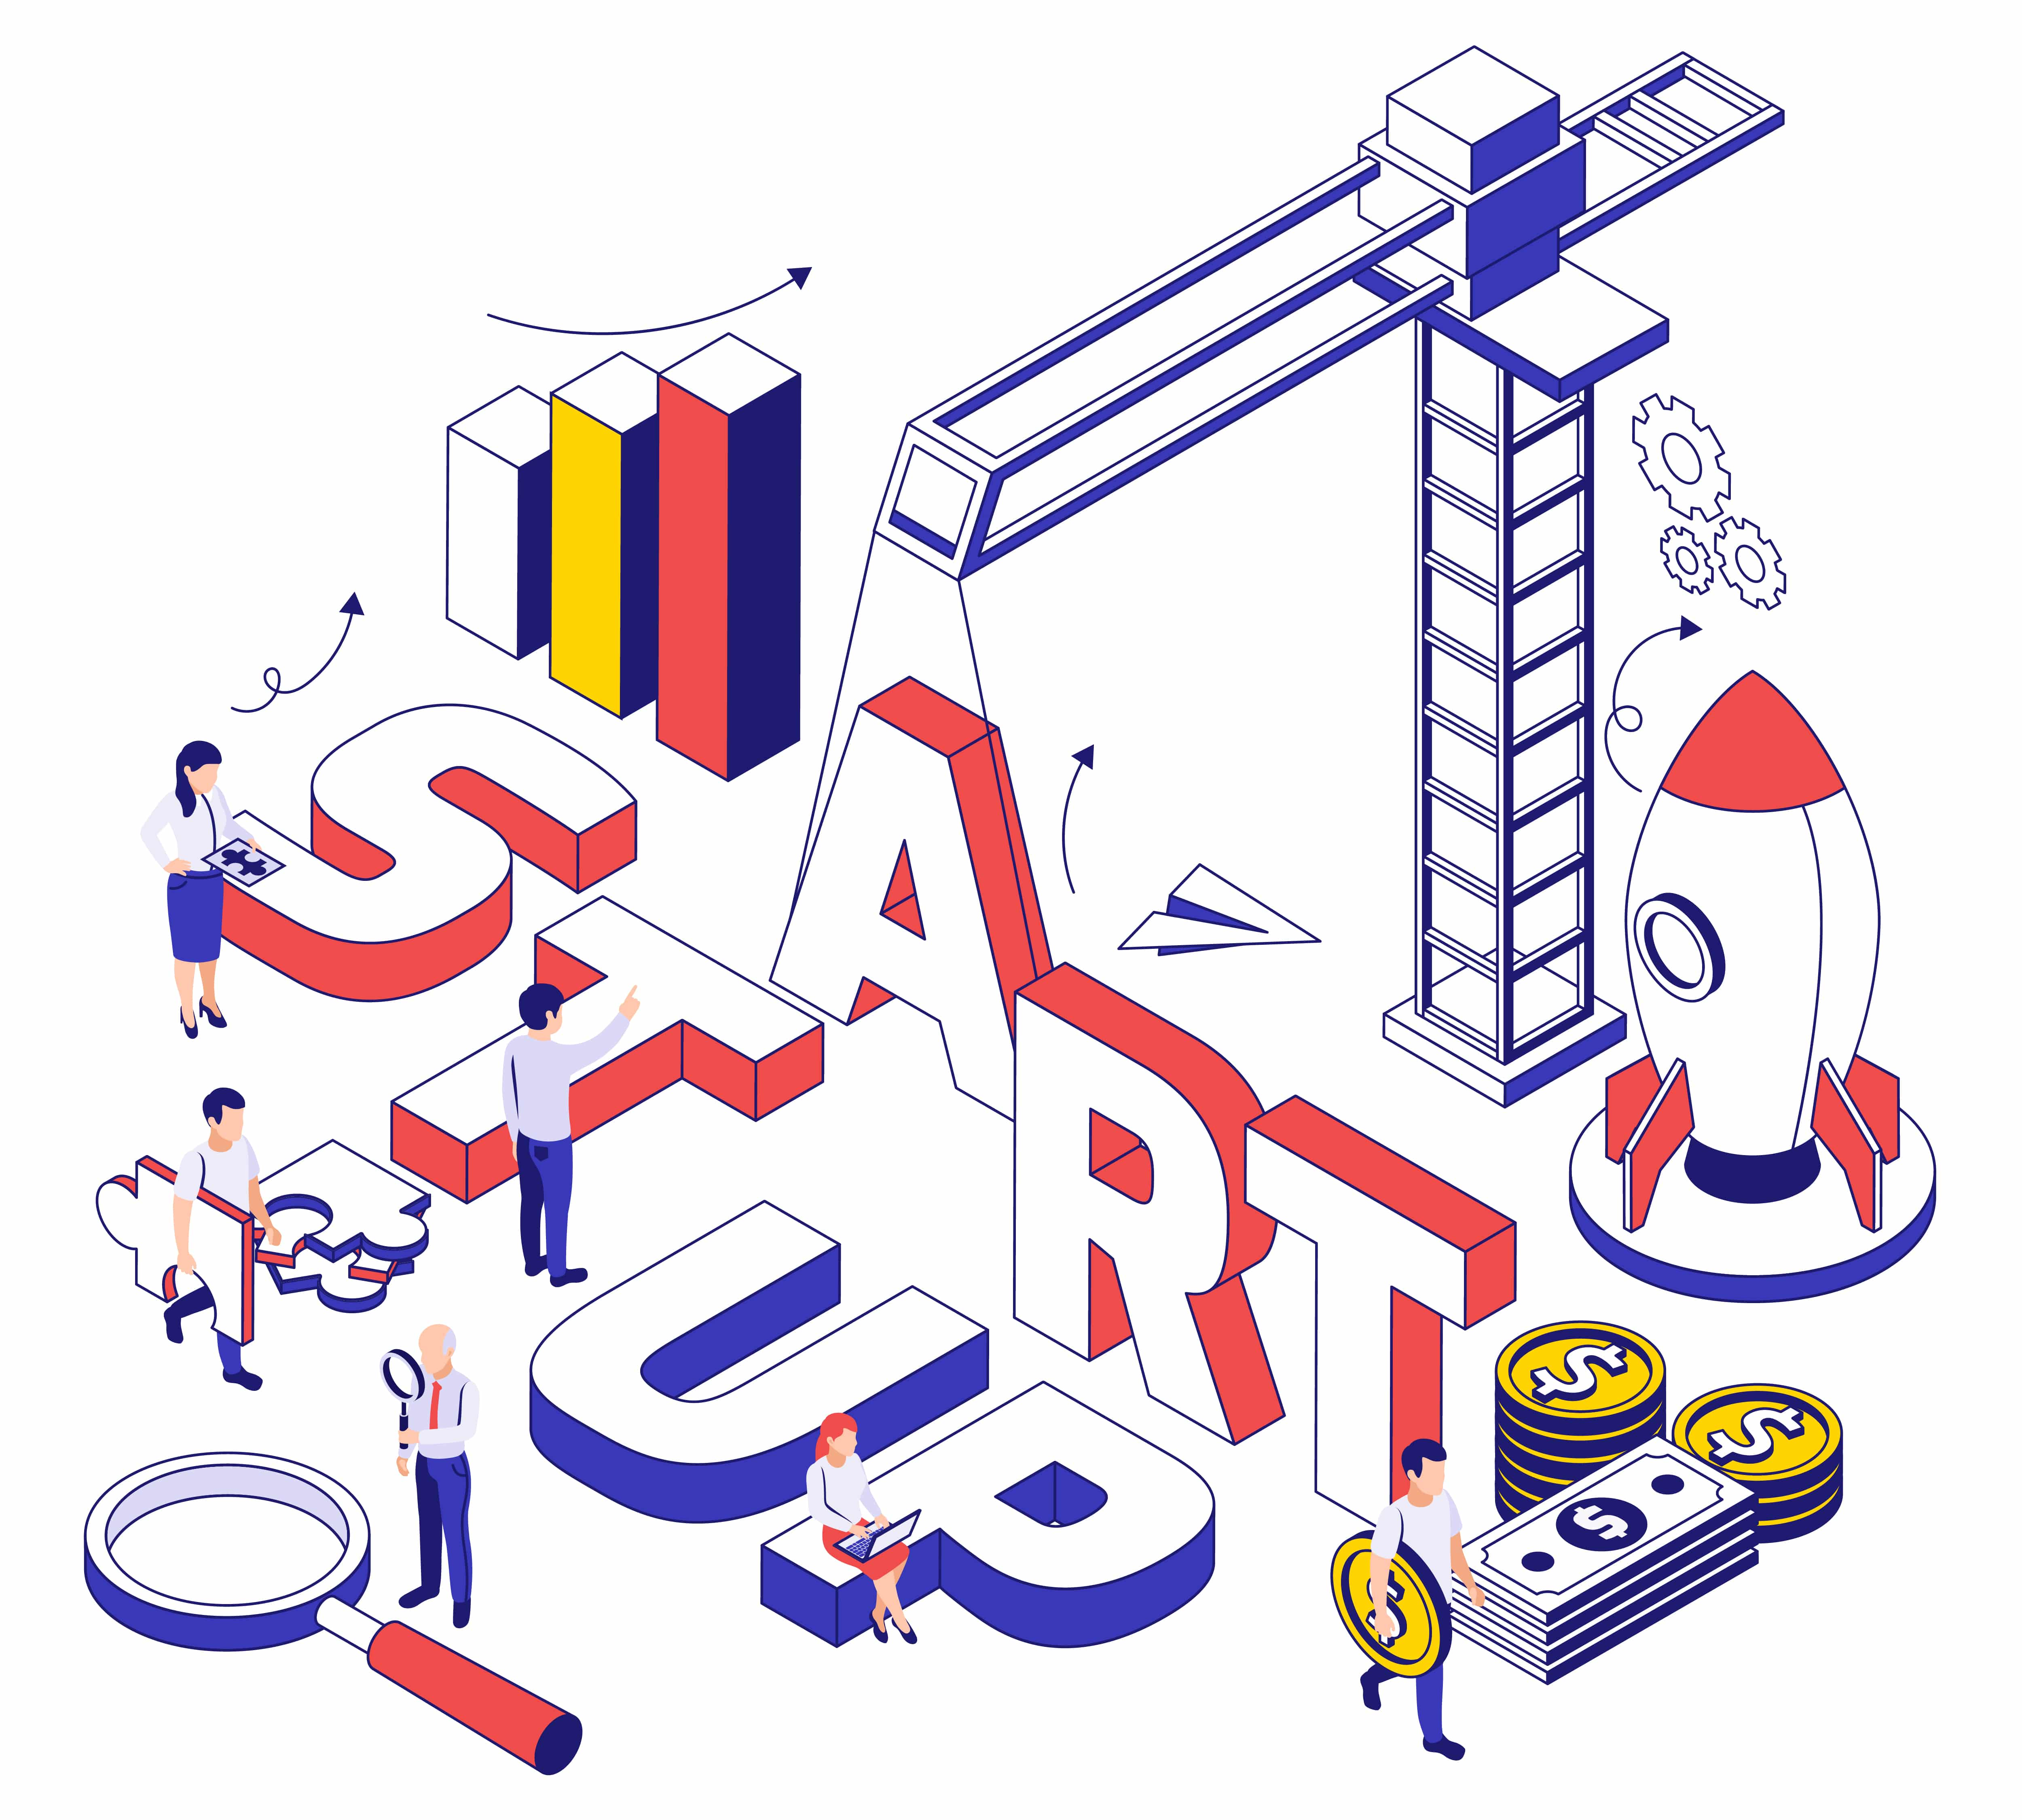

*source - <a href="https://www.freepik.com/free-vector/startup-construction-development-3d-thin-line-art-style-design-concept-isometric-illustration_15481135.htm#query=startups&position=0&from_view=search&track=sph">Image by macrovector</a> on Freepik*

# The dataset provided is for indian startup's funding dated from Janurary'15 to August'17. On basis of datasets, we'll try to draw-up some insights and also try to answer few questions from the data.


Step 1: 
*  Importing various libraries to the python 
*  Importing given dataset through pandas

In [2]:
# Importing libraries :

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as ticker
%matplotlib inline

# Importing dataset : 

df = pd.read_csv('/kaggle/input/indian-startups-funding/startup_funding.csv')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Step 2 : Describing dataset for the 1st time and getting a glance of its various features. Also, we'll try to gather a quick intel on various parameters, dicrepancies and other valuables required for further analysis

In [3]:
# Getting look of the 1st 5 rows of dataset : 

df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
# This will give slight clarity on the various features of dataset as well as total not-null objects present in various columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


*Following are the features of the Dataframe :* 
1. S.No - Serial Number
2. Date - Date of funding in the format DD/MM/YYYY
3. StartupName - Name of the funded startup 
4. IndustryVertical - Startup Industry
5. SubVertical - Sub-category of the industry
6. City-Location - City from which startup is from 
7. InvestorsName - Name of the funding Investors 
8. InvestementType - Type of Investement received by the startup 
9. AmountInUSD - Funding received in US Dollars
10. Remarks - Other Misc Information ; if available any 

***Glimpse of null values present in the dataset with the heatmap***

<Axes: >

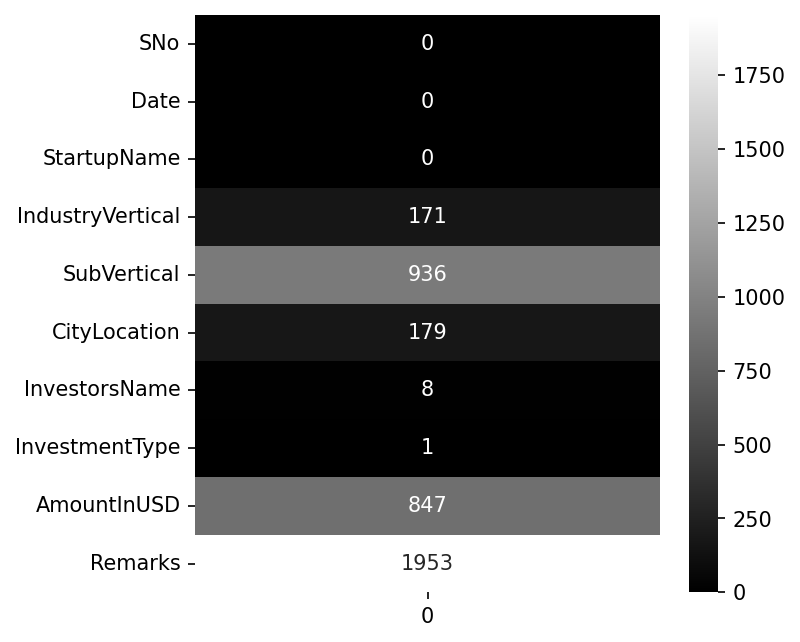

In [5]:
# Plotting Heatmap for the Null values in the dataframe :

plt.figure(figsize=(5,5) , dpi = 150)
df.isna().sum()

# Setting the colormap to Greyscale for easy visibility and annotations to be true to get exact figures on visualisation.
# fmt = '.0f' is used to avoid scientific figures on the annotations 

sns.heatmap(pd.DataFrame(df.isna().sum()) , cmap = 'gray' , annot = True , fmt = '.0f')

In [6]:
# While parsing the date to datetime, we found there are some data having 2 '/' rather than 1, rectifying the error by this :

for i in range( len(df.Date)) :
    element = df.Date[i]
    if element[6] == '/' :
        element_1 = element[:6] + element[7:]
        df.Date[i] = element_1

/tmp/ipykernel_20/1415246325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[i] = element_1


In [7]:
# Parsing the Date Column to the DATETIME format :

df.Date = pd.to_datetime(df.Date)

/tmp/ipykernel_20/2315629625.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Date = pd.to_datetime(df.Date)


In [8]:
# Creating Separate column for YEAR of staartup founded :
df['FundingYear'] = df.Date.apply(lambda x : x.year)
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,FundingYear
0,0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017
1,1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,2017-02-08,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017
4,4,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017


# INSIGHTS :

INSIGHT 1 : FREQUENCIES OF FUNDING IN THE RECENT YEARS

SOLUTION : GETTING NO OF FREQUENCIES FOR ALL 3 YEARS ; I.E. 2015 , 2016 , 2017 

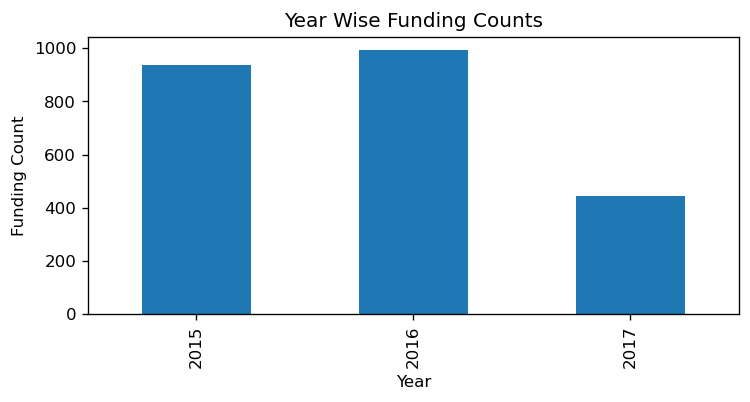

In [9]:
plt.figure(figsize = (7,3) , dpi = 120)
YearWiseFunding = df['FundingYear'].value_counts().sort_index()
YearWiseFunding.plot(kind = 'bar')
plt.title('Year Wise Funding Counts')
plt.xlabel('Year')
plt.ylabel('Funding Count')
plt.show()

### *Hence, In year 2016, maximum no of times Fundings were received by the startups, followed by 2015. There's sharp decline in the funding frequency for the year 2017*

INSIGHT 2 : TOP INDUSTRIES TO GET THE FUNDING 

SOLUTION : GETTING TOP 10 INDUSTRIES, FUNDED MAXIMUM NO OF TIMES 

/tmp/ipykernel_20/1724354336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.IndustryVertical = df_1.IndustryVertical.apply(lambda x : x.title())


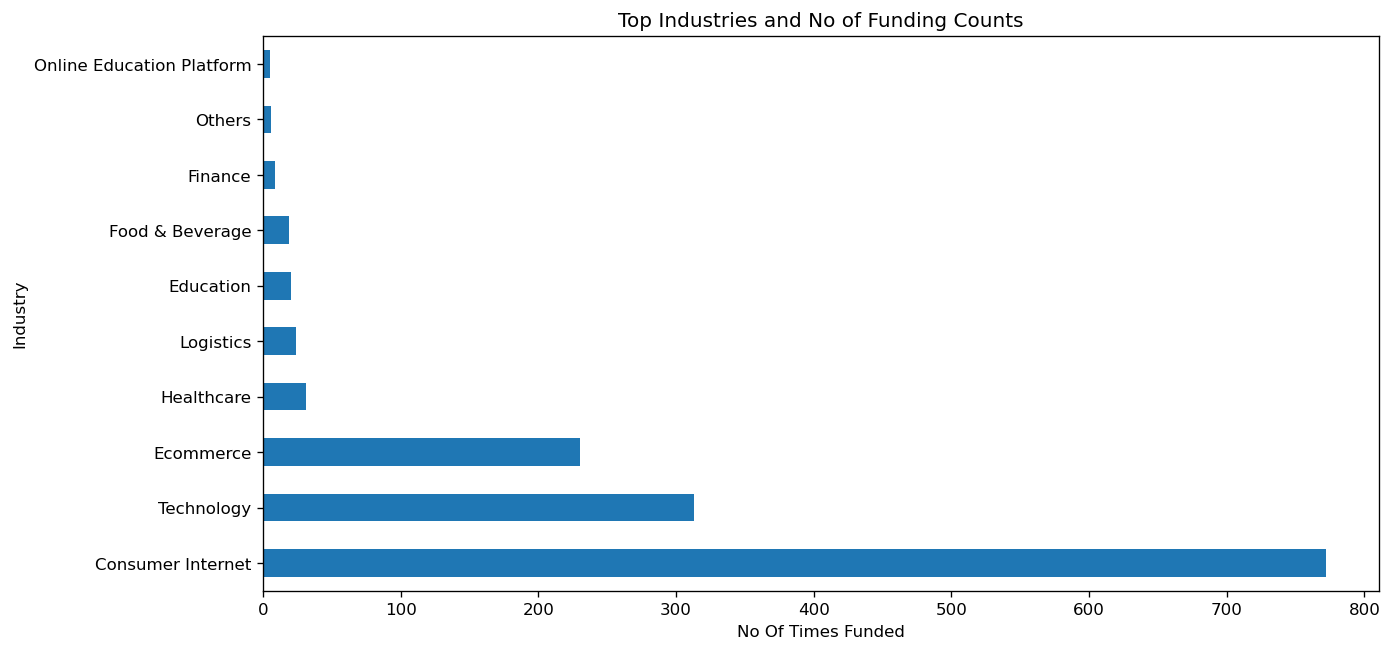

In [10]:
# ELIMINATING NA VALUES FROM THE INDUSTRY_VERTICAL AS THERE ARE 171 NAN VALUES 
# USING CAPITALIZE FUNCTION TO CAPITALIZE FIRST LETTER OF EVERY WORD TO AVOID ERRORS IN COUNT 
df_1 = df[~df.IndustryVertical.isna()]
df_1.IndustryVertical = df_1.IndustryVertical.apply(lambda x : x.title())

plt.figure(figsize = (12,6) , dpi = 120)
df_1 = df_1.IndustryVertical.value_counts()[:10]
df_1.plot(kind = 'barh')
plt.title('Top Industries and No of Funding Counts')
plt.xlabel('No Of Times Funded')
plt.ylabel('Industry')
plt.show()

### *From the Data Above, its clear that Starup based on Consumer Internet received maximum no of times fundings than the 9 other industry verticals. Its followed by Technology and Ecommerce. The least no of times funding received is for Online Education Platform Services*. 
### *The insight is collective for all 3 years for each industry vertical* 

# PROBLEM STATEMENTS :


### Problem 1 : CITIES CHOSEN FOR STARTING A STARTUP

In [11]:
# The Cities might have case Issues, using TITLE() function on every city 
# Also, elimimating NA values for smooth analysis :

df_2 = df[~df.CityLocation.isna()]
df_2.CityLocation = df_2.CityLocation.apply(lambda x : x.title())


/tmp/ipykernel_20/2528377497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.CityLocation = df_2.CityLocation.apply(lambda x : x.title())


In [12]:
# Printing Unique values of Cities :

df_2.CityLocation.unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Trivandrum', 'Chennai',
       'Chandigarh', 'Jaipur', 'Vadodara', 'Surat', 'Missourie', 'Panaji',
       'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa',
       'Agra', 'Bangalore/ Bangkok', 'Hubli', 'Delhi', 'Kerala',
       'Kozhikode', 'Us', 'Coimbatore', 'Siliguri', 'Usa', 'Lucknow',
       'Kanpur', 'Sfo / Bangalore', 'London', 'Seattle / Bangalore',
       'Pune/Seattle', 'Pune / Dubai', 'Bangalore / Sfo', 'Varanasi',
       'Bhopal', 'New Delhi / Us', 'Mumbai / Uk', 'Jodhpur',
       'Hyderabad/Usa', 'Boston', 'Bangalore / Palo Alto', 'Mumbai / Ny',
       'Usa/India', 'Goa/Hyderabad', 'Noida / Singapore', 'Belgaum',
       'Pune / Us', 'Chennai/ Singapore', 'Pune / Singapore',
       'Bangalore / San Mateo', 'New York/ India', 'Us/India',
       'Gurgaon / Sfo', 'Bangalore / Usa', 'New Delhi/ Houston', 'Nagpur',
       'Mumbai / Global', 'India

#### There are 2 main issues with the data :
1. There are multi cities given, out of which, we'll consider only indian cities 
2. There are 2 different city names for Delhi

In [13]:
# Changing City wherever its Delhi, as New Delhi 

df_2.CityLocation[df_2.CityLocation == 'Delhi'] = 'New Delhi'

# Getting separate values where there are multi cities given :

multi_cities = df[~df.CityLocation.isna()]
multi_cities['CitiesList'] = multi_cities.CityLocation.apply(lambda x : x.split('/'))

# Printing list of Multi_Cities values :

multi_cities.CitiesList[multi_cities.CitiesList.apply(lambda x : len(x)>1)]

/tmp/ipykernel_20/973149835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.CityLocation[df_2.CityLocation == 'Delhi'] = 'New Delhi'
/tmp/ipykernel_20/973149835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.CityLocation[df_2.CityLocation == 'Delhi'] = 'New Delhi'
/tmp/ipykernel_20/973149835.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_cities['Citi

678         [Bangalore,  Bangkok]
1068           [SFO ,  Bangalore]
1152       [Seattle ,  Bangalore]
1186              [Pune, Seattle]
1239              [Pune ,  Dubai]
1245           [Bangalore ,  SFO]
1397            [New Delhi ,  US]
1398               [Mumbai ,  UK]
1476             [Hyderabad, USA]
1490     [Bangalore ,  Palo Alto]
1501               [Mumbai ,  NY]
1534                 [USA, India]
1551        [Bangalore,  Bangkok]
1557             [Goa, Hyderabad]
1571         [Noida ,  Singapore]
1583                 [Pune ,  US]
1596        [Chennai,  Singapore]
1642          [Pune ,  Singapore]
1647     [Bangalore ,  San Mateo]
1677           [New York,  India]
1742                  [US, India]
1777             [Gurgaon ,  SFO]
1794           [Bangalore ,  USA]
1830        [New Delhi,  Houston]
1840            [New Delhi ,  US]
1921           [Mumbai ,  Global]
1922                [India ,  US]
2003                 [Pune ,  US]
2009                 [Pune ,  US]
2056    [New D

> **There are several Startups with more than 1 City given, as per the above. We'll try to get only Indian Cities from it**

In [14]:
# For most column values, Indian Cities is on 0th index, which can be extracted easily, while for some, we have to maintain it manually :
# 1152 , 1534 , 1557 , 1677 , 1742 , 2140 - These indexes should have 2nd city to be mentioned rest 1st city for the others


idx = [1152 , 1534 , 1557 , 1677 , 1742 , 2140]
cities_done = []

for i in idx :
    
    multi_cities.CitiesList[i] = multi_cities.CitiesList[i][1].strip()
    cities_done.append(multi_cities.CitiesList[i])
    
    
# For other cities, we'll pick up the 1st city as the startup city:

multi_cities.CitiesList[~multi_cities['CitiesList'].isin(cities_done)] = multi_cities.CitiesList.apply(lambda x : x[0])

multi_cities.CitiesList = multi_cities.CitiesList.apply(lambda x : x.strip())
multi_cities.CitiesList = multi_cities.CitiesList.apply(lambda x : x.title())
multi_cities.CitiesList[multi_cities.CitiesList == 'Delhi'] = 'New Delhi'

/tmp/ipykernel_20/2773838194.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_cities.CitiesList[i] = multi_cities.CitiesList[i][1].strip()
/tmp/ipykernel_20/2773838194.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_cities.CitiesList[~multi_cities['CitiesList'].isin(cities_done)] = multi_cities.CitiesList.apply(lambda x : x[0])
/tmp/ipykernel_20/2773838194.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_

**Let's print unique values of the cities for a glance if further cleaning needed :**


In [15]:
multi_cities.CitiesList.unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Trivandrum', 'Chennai',
       'Chandigarh', 'Jaipur', 'Vadodara', 'Surat', 'Missourie', 'Panaji',
       'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa',
       'Agra', 'Hubli', 'Kerala', 'Kozhikode', 'Us', 'Coimbatore',
       'Siliguri', 'Usa', 'Lucknow', 'Kanpur', 'Sfo', 'London',
       'Varanasi', 'Bhopal', 'Jodhpur', 'Boston', 'India', 'Belgaum',
       'Nagpur', 'Udaipur'], dtype=object)

In [16]:
multi_cities.CitiesList.info

<bound method Series.info of 0       Bangalore
1          Mumbai
2       New Delhi
3          Mumbai
4       Hyderabad
          ...    
2196    Bangalore
2197    Bangalore
2198    Bangalore
2199      Chennai
2200        Noida
Name: CitiesList, Length: 2193, dtype: object>

> **Extracting TOP-10 Cities for starting a startup from the data we created recently i.e. multi_cities**

In [17]:
top_10_cities = multi_cities.groupby('CitiesList')['CitiesList'].count().sort_values(ascending = False)[:10]
top_10_cities

CitiesList
Bangalore    636
Mumbai       449
New Delhi    389
Gurgaon      241
Pune          91
Noida         79
Hyderabad     79
Chennai       67
Ahmedabad     35
Jaipur        25
Name: CitiesList, dtype: int64

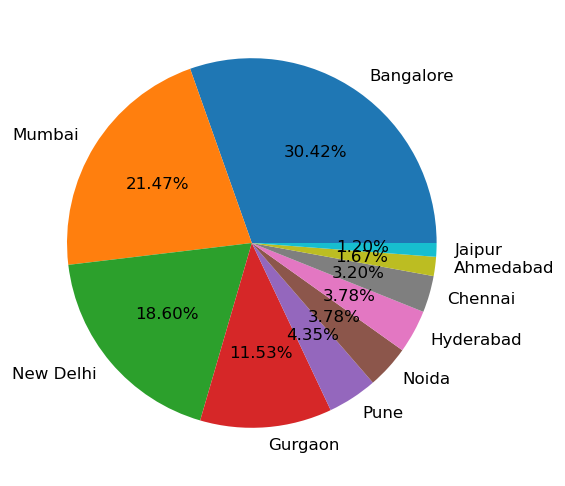

In [18]:
plt.figure(figsize = (5,5) , dpi = 120)
plt.pie(top_10_cities , labels = list(top_10_cities.index) , autopct = '%.2f%%')
plt.show()

**For Startups, Banglore is preferred the most, followed by Mumbai and New Delhi ; covering almost 70% startups of India**

### PROBLEM 2 : Percent Fundings received by top Cities of India

In [19]:
# for this problem, we'll use the previous dataframe we created to get top cities for startups ; multi_cities :

top_fundings = multi_cities[~multi_cities.AmountInUSD.isna()]  # This will eliminate all NA values from the Dataframe

top_fundings.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,FundingYear,CitiesList
0,0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017,Bangalore
3,3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017,Mumbai
4,4,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017,Hyderabad
5,5,2017-01-07,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN,2017,Bangalore
6,6,2017-03-07,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN,2017,Ahmedabad


In [20]:
# Replacing ',' in AmountInUSD columns to '' so that it will not cause hurdle in converting the data into float :

top_fundings.AmountInUSD = top_fundings.AmountInUSD.apply(lambda x : x.replace(',' , ''))
top_fundings.AmountInUSD = top_fundings.AmountInUSD.apply(lambda x : int(x))

/tmp/ipykernel_20/3746062581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_fundings.AmountInUSD = top_fundings.AmountInUSD.apply(lambda x : x.replace(',' , ''))
/tmp/ipykernel_20/3746062581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_fundings.AmountInUSD = top_fundings.AmountInUSD.apply(lambda x : int(x))


In [21]:
top_fundings = top_fundings.groupby('CitiesList')['AmountInUSD'].sum().sort_values(ascending = False) [:10]
top_fundings

CitiesList
Bangalore    8422974108
New Delhi    2818247500
Mumbai       2354934500
Gurgaon      2069021500
Chennai       411105000
Pune          366653000
Hyderabad     196362000
Noida         170638000
Ahmedabad      98186000
India          52550000
Name: AmountInUSD, dtype: int64

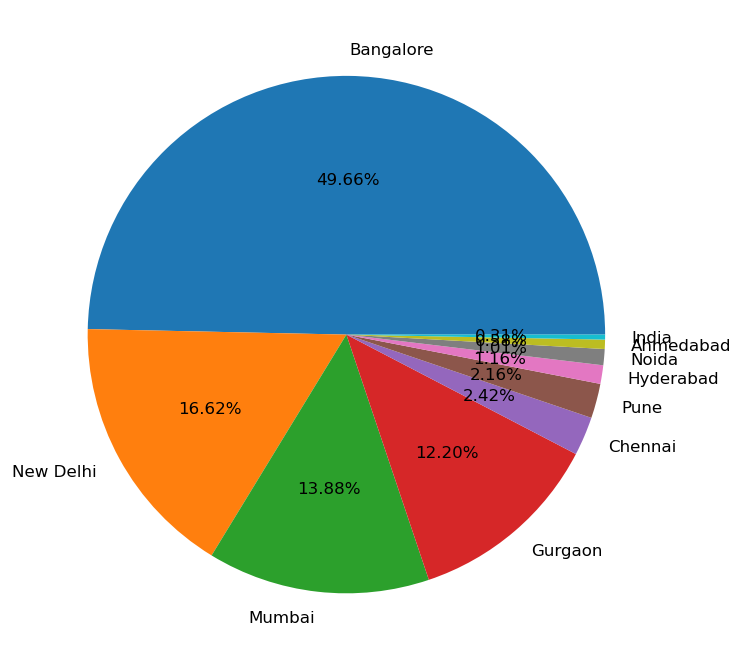

In [22]:
# Plotting a Pie chart for amount of funding received in percentage, by top 10 cities :

plt.figure(figsize = (7,7) , dpi = 120)
plt.pie(top_fundings , labels = list(top_fundings.index) , autopct = '%.2f%%')
plt.show()

**From above Pie Chart, Bangalore Received highest share of fundings, followed by New Delhi and Mumbai**

### PROBLEM 3 : Percent of Amount funded for each Investement type for all 4 Types of Investements

In [23]:
# Let's see the total type of investments the dataframe contains :

df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

**There are 5 errors in columns :**
1. All data is not in same case 
2. Spacing is not present in all 

**Distinct Funding Types :**

In [24]:
investment_df = df[~df.InvestmentType.isna()]
investment_df = investment_df[~investment_df.AmountInUSD.isna()]
investment_df.AmountInUSD = investment_df.AmountInUSD.apply(lambda x : x.replace(',' , ''))
investment_df.AmountInUSD = investment_df.AmountInUSD.apply(lambda x : int(x))


investment_df.InvestmentType[investment_df['InvestmentType']=='SeedFunding'] = 'Seed Funding'
investment_df.InvestmentType[investment_df['InvestmentType']=='PrivateEquity'] = 'Private Equity'
investment_df.InvestmentType = investment_df.InvestmentType.apply(lambda x : x.title())
print(investment_df.InvestmentType.unique())

['Private Equity' 'Seed Funding' 'Debt Funding' 'Crowd Funding']


/tmp/ipykernel_20/3882798002.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investment_df.InvestmentType[investment_df['InvestmentType']=='SeedFunding'] = 'Seed Funding'
/tmp/ipykernel_20/3882798002.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  investment_df.InvestmentType[investment_df['InvestmentType']=='PrivateEquity'] = 'Private Equity'


**Total Funding received by distinct funding types :**

In [25]:
# Printing Total Investment received by different types of Investments :

investment_df = investment_df.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending = False)
investment_df

InvestmentType
Private Equity    18007085000
Seed Funding        332345708
Debt Funding          7800000
Crowd Funding          155768
Name: AmountInUSD, dtype: int64

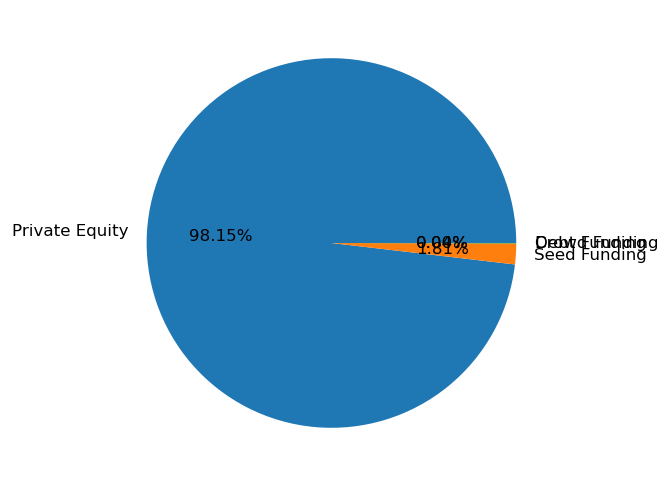

In [26]:
# Plotting a Pie Chart for the above :

plt.figure(figsize = (5,5) , dpi = 120)
plt.pie(investment_df , labels = list(investment_df.index), autopct = '%.2f%%')
plt.show()

**For above pie chart, maximum Fundings were received as Private Equity and it dominates other other 3 funding types**

### PROBLEM 4 : Finding type of industries which get easy fundings from the market

In [27]:
# Let's create a new dataframe, with industry types and amount of fundings they received :

industries_fundings = df[~df.IndustryVertical.isna()]                               # Removing NaN values for industry verticals
industries_fundings = industries_fundings[~industries_fundings.AmountInUSD.isna()] # Removing NaN values for Funding Amount

industries_fundings['AmountInUSD'] = industries_fundings.AmountInUSD.apply(lambda x : x.replace(',' , ''))
industries_fundings['AmountInUSD'] = industries_fundings.AmountInUSD.apply(lambda x : int(x))            # Converting string to integer for calculations


industries_fundings.IndustryVertical = industries_fundings.IndustryVertical.apply(lambda x : x.title())  

industries_fundings = pd.DataFrame(industries_fundings.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False))   # Creating required dataframe


In [28]:
# Getting top 5 Industries having maximum fundings received :

top_industries_funding_wise = industries_fundings[:5]
top_industries_funding_wise.reset_index(drop = False , inplace = True)

In [29]:
# Getting percentage of the fundings received by top 5 startups :

amount_sum = top_industries_funding_wise['AmountInUSD'].sum()
top_industries_funding_wise['PercentOfFundings'] = top_industries_funding_wise['AmountInUSD'].apply(lambda x : round(( x / amount_sum ) * 100 , 2) ) 

/tmp/ipykernel_20/548672903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_industries_funding_wise['PercentOfFundings'] = top_industries_funding_wise['AmountInUSD'].apply(lambda x : round(( x / amount_sum ) * 100 , 2) )


In [30]:
top_industries_funding_wise    # Printing the required dataframe and information 

,IndustryVertical,AmountInUSD,PercentOfFundings
0,Ecommerce,4281189608,40.53
1,Consumer Internet,3797089000,35.95
2,Technology,1103593500,10.45
3,Online Marketplace,700000000,6.63
4,E-Commerce & M-Commerce Platform,680000000,6.44


Therefore, Ecommerce received maximum percentage of fundings amount the other 4 ; 40.53%, followed by Consumer Internet and Technology.

Let's create a Donut Chart for the this data for a good visualisation 

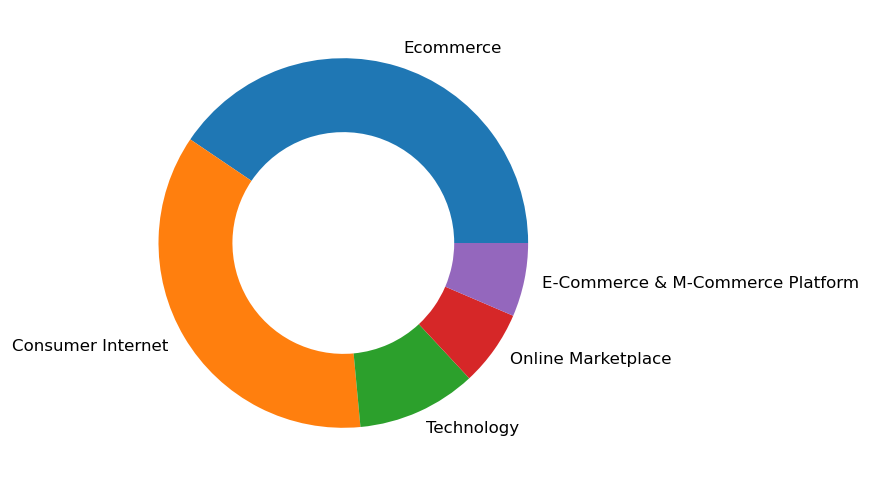

In [31]:
plt.figure(figsize = (5,5) , dpi = 120)

plt.pie(top_industries_funding_wise.PercentOfFundings , labels = list(top_industries_funding_wise.IndustryVertical) , wedgeprops = { 'width' : 0.4} )
plt.show()

### PROBLEM 5 : Finding Top-5 Startups with total amount of fundings it received

**Top Startups with amount of fundings they received :**

In [32]:
# Creating dataframe with top 5 startups with amount of fundings they received :

top_startups = df[~df.StartupName.isna()]
top_startups = top_startups[~top_startups.AmountInUSD.isna()]

top_startups.AmountInUSD = top_startups.AmountInUSD.apply(lambda x : x.replace(',' , ''))
top_startups.AmountInUSD = top_startups.AmountInUSD.apply(lambda x : int(x))
top_startups.StartupName = top_startups.StartupName.apply(lambda x : x.title())
top_startups.StartupName.unique


<bound method Series.unique of 0               Touchkin
3                   Zepo
4           Click2Clinic
5          Billion Loans
6       Ecolibriumenergy
              ...       
2366       Grabhouse.Com
2367          Printvenue
2368            Graphene
2369      Mad Street Den
2371    Couponmachine.In
Name: StartupName, Length: 1525, dtype: object>

**There's problem in names of important startups. We're guided to handle only important ones :**


In [33]:
top_startups['StartupName'][top_startups.StartupName == 'Flipkart.com'] = 'Flipkart'
top_startups['StartupName'][top_startups.StartupName == 'Flipkart.Com'] = 'Flipkart'
top_startups['StartupName'][top_startups.StartupName == 'Ola Cabs'] = 'Ola'
top_startups['StartupName'][top_startups.StartupName == 'Olacabs'] = 'Ola'
top_startups['StartupName'][top_startups.StartupName == 'Oyo Rooms'] = 'Oyo'
top_startups['StartupName'][top_startups.StartupName == 'Oyorooms'] = 'Oyo'
top_startups['StartupName'][top_startups.StartupName == 'Paytm Marketplace'] = 'Paytm'

/tmp/ipykernel_20/40700709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_startups['StartupName'][top_startups.StartupName == 'Flipkart.com'] = 'Flipkart'
/tmp/ipykernel_20/40700709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_startups['StartupName'][top_startups.StartupName == 'Flipkart.Com'] = 'Flipkart'
/tmp/ipykernel_20/40700709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_startups['StartupName'][top_

In [34]:
# Creating required dataframe :

important_startups = top_startups.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False)
important_startups[:50]     # Getting glimpse of top 50 startups to search for errors in names of important startups

StartupName
Paytm                    2340000000
Flipkart                 2259700000
Ola                      1899500000
Snapdeal                  700000000
Oyo                       637000000
Quikr                     230000000
Delhivery                 215000000
Foodpanda                 210000000
Shopclues                 207700000
Bigbasket                 207000000
Cartrade                  200000000
Makemytrip                180000000
Hike                      175000000
Practo                    175000000
Byju’S                    175000000
Swiggy                    170500000
Grofers                   165000000
Ecom Express              137000000
Freecharge                137000000
Pepperfry                 131300000
Mobikwik                  121600000
Rivigo                    120000000
Freshdesk                 105000000
Saavn                     100000000
Inmobi                    100000000
Fractal Analytics         100000000
Blackbuck                  95000000
Yepme           

/tmp/ipykernel_20/1050336018.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


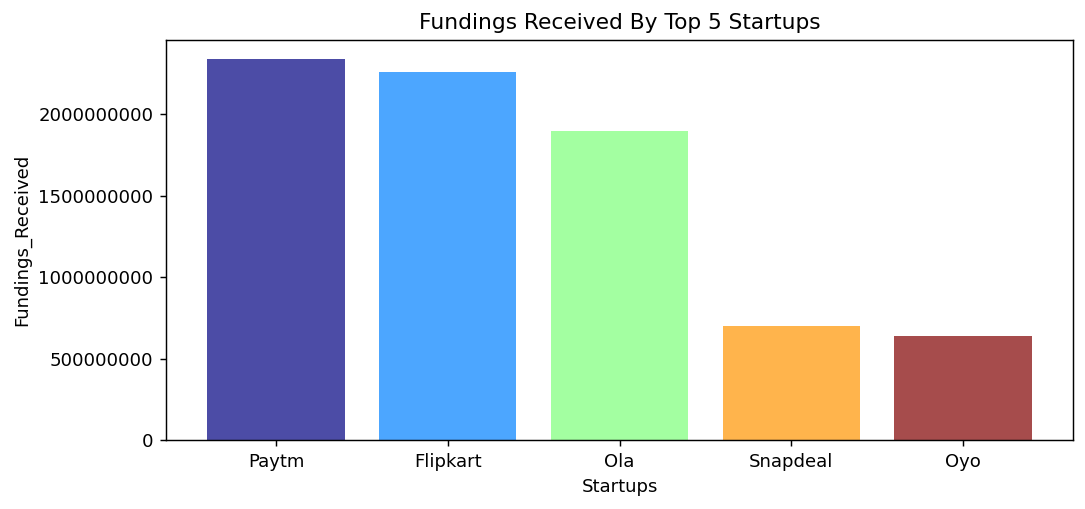

In [35]:
# Plotting Fundings received by top 5 Startups 

cmap = plt.cm.get_cmap('jet')
colors = cmap(np.linspace(0 , 1 , len(important_startups.index[:5])))

fig , ax = plt.subplots(figsize = (9,4) , dpi = 130 )
ax.bar(important_startups.index[:5] , important_startups[:5] , alpha = 0.7 , color = colors )

ax.set_xlabel('Startups')
ax.set_ylabel('Fundings_Received')
ax.set_title('Fundings Received By Top 5 Startups')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.show()

### PROBLEM 6 : Finding list of important investors

In [36]:
investors = df[~df.InvestorsName.isna()]
investors.InvestorsList = investors.InvestorsName.apply(lambda x : x.split(','))
Investors_List = [j.title().strip() for i in investors.InvestorsList for j in i if 'undisclosed' not in j.lower() and j != '']
Investors_arr = np.array(Investors_List)

unique , counts = np.unique(Investors_arr , return_counts = True)

Investors = dict(zip(unique , counts))
Investors_dict = dict(sorted(Investors.items() , key = lambda x : x[1] , reverse = True))


/tmp/ipykernel_20/3706327156.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  investors.InvestorsList = investors.InvestorsName.apply(lambda x : x.split(','))


**Important Investors :**

In [37]:
important_investors = pd.DataFrame({'InvestorName' : Investors_dict.keys() , 'TimesInvested' : Investors_dict.values()})
important_investors = important_investors[:10]
important_investors

,InvestorName,TimesInvested
0,Sequoia Capital,64
1,Accel Partners,53
2,Kalaari Capital,44
3,Saif Partners,43
4,Indian Angel Network,41
5,Blume Ventures,40
6,Ratan Tata,30
7,Nexus Venture Partners,25
8,Rajan Anandan,25
9,Tiger Global,25


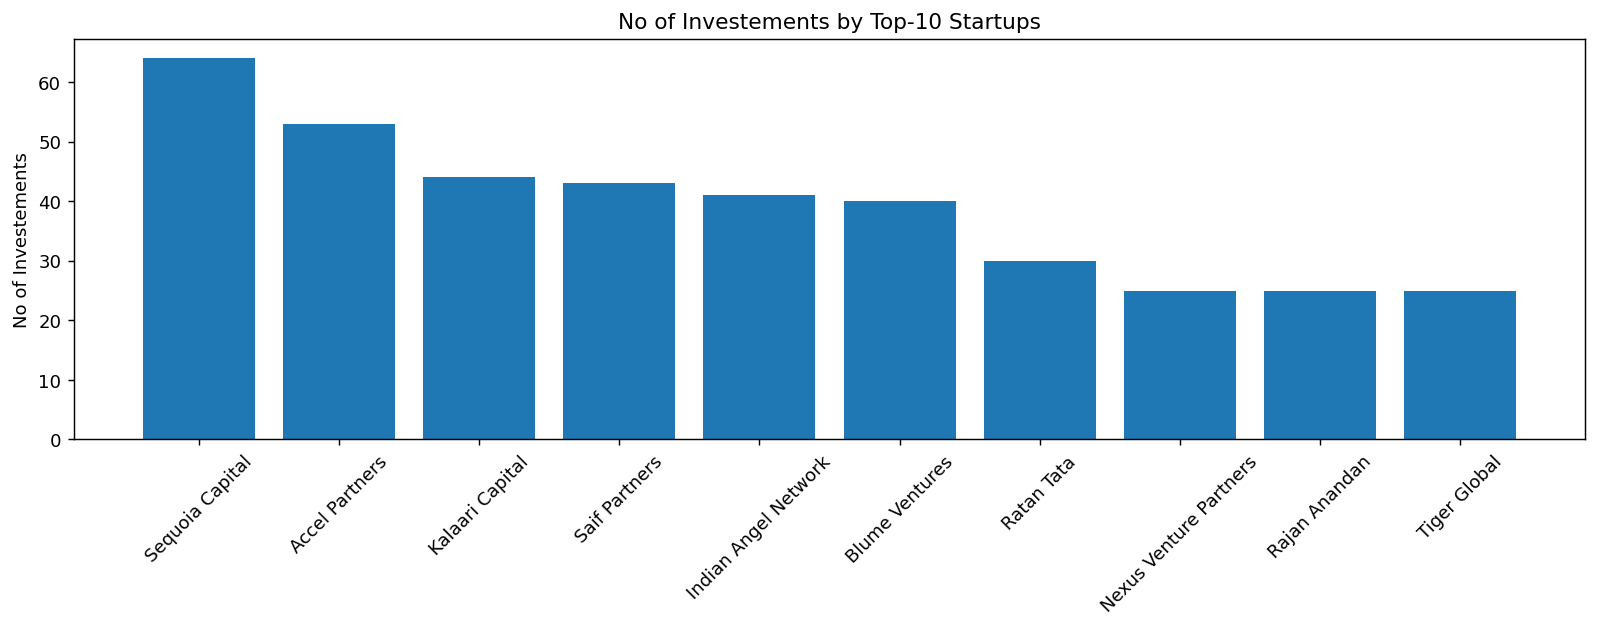

In [38]:
fig , ax = plt.subplots(figsize = (15,4), dpi = 130)
ax.bar (important_investors['InvestorName'] , important_investors['TimesInvested'])
plt.xticks(rotation = 45)
plt.ylabel('No of Investements')
plt.title('No of Investements by Top-10 Startups')
plt.show()

**From above Graph, Sequoia capital is the biggest investor followed by Accel Partners and Kalaari Capitals**

# Thanks for visiting the notebook. If you've been to this far, kindly consider to upvote. 